In [109]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [110]:
mnist = fetch_openml('mnist_784')

In [111]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [112]:
X, y = mnist['data'] , mnist['target']

In [113]:
X = np.array(X)
y = np.array(y)

In [114]:
X.shape

(70000, 784)

In [115]:
y.shape

(70000,)

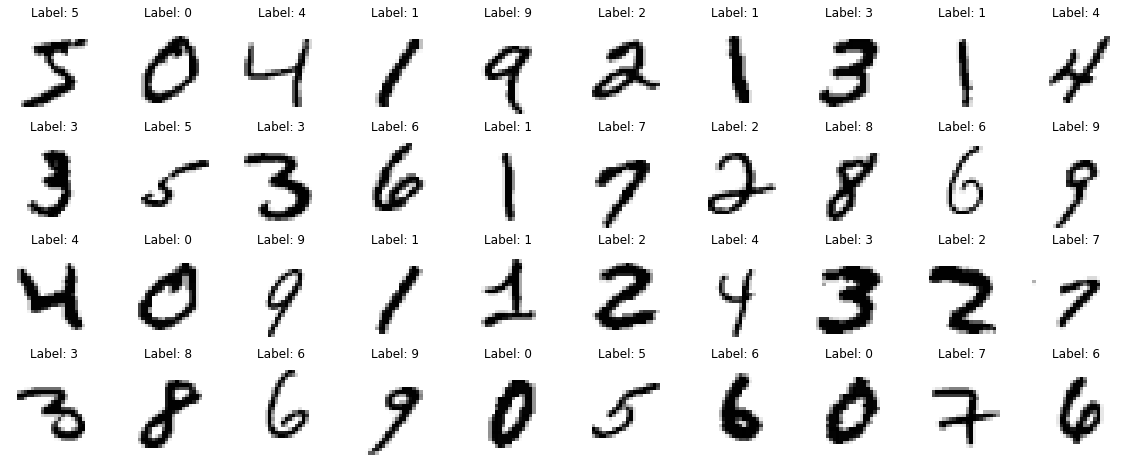

In [116]:
# A few examples
plt.figure(figsize = (20,8))

for index, (image, label) in enumerate(zip(X[0:40], y[0:40])):
    ax = plt.subplot(4, 10, index+1)
    ax.axis('off')
    
    plt.imshow(np.reshape(X[index], (28,28)), cmap='binary')
   
    plt.title('Label: %i' % int(label), fontsize = 12)

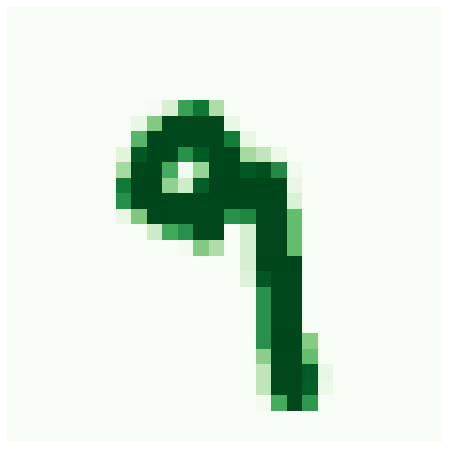

In [117]:
any_digit = X[43000]
any_digit_image = any_digit.reshape(28,28)
plt.figure(figsize=(16,8))
plt.imshow(any_digit_image, cmap = matplotlib.cm.Greens, interpolation='nearest')
plt.axis('off')
plt.show()

In [118]:
pd.Series(y).value_counts(normalize=True)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
dtype: float64

In [119]:
X = X / 255.0

In [120]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:60000], X[60000:69000], X[69000:], y[:60000], y[60000:69000], y[69000:]

In [121]:
index_shuffled = np.random.permutation(60000)
X_train, y_train = X_train[index_shuffled], y_train[index_shuffled]

95% of variance can be reached by 154 components


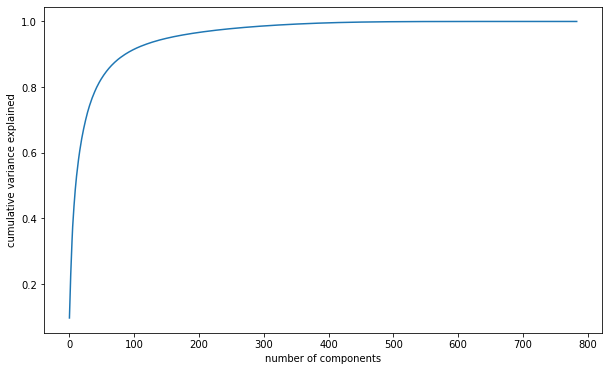

In [122]:
from sklearn.decomposition import PCA

RANDOMSEED = 42
pca = PCA(random_state=RANDOMSEED)
pca.fit(X_train)

acum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(acum_variance_ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

print('95% of variance can be reached by {} components'.format(np.argmax(acum_variance_ratio >= 0.95) + 1))

In [123]:
pca_analyzer = PCA(n_components=2, random_state=RANDOMSEED)

x2dim = pca_analyzer.fit_transform(X_train)

pca_df = pd.DataFrame(data=x2dim, columns=['comp1', 'comp2'])
pca_df = pd.concat([pca_df, pd.DataFrame(X_train)], axis=1)

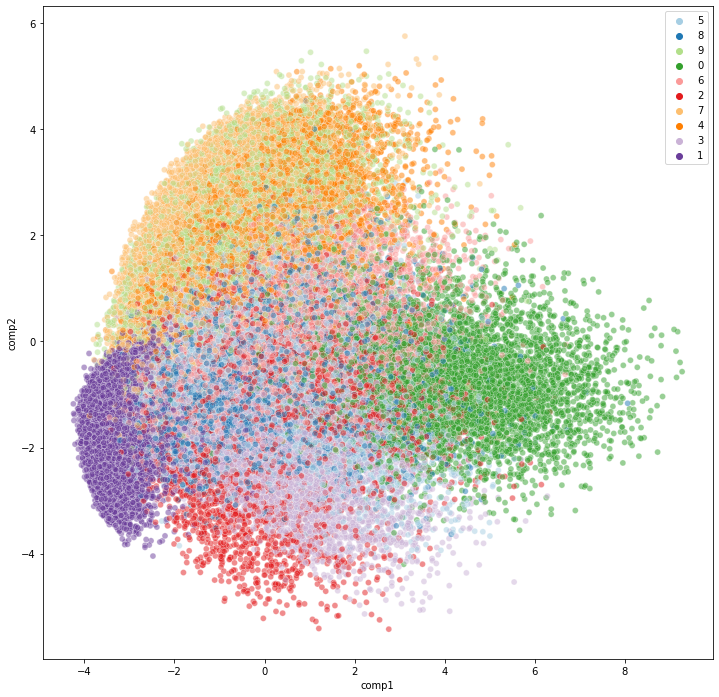

In [124]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=pca_df, x='comp1', y='comp2', hue=y_train, alpha=0.5, palette='Paired')

In [125]:
forest = RandomForestClassifier(n_estimators=500, n_jobs=3, verbose=True, random_state=RANDOMSEED)

In [126]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   13.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   57.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  2.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                       oob_score=False, random_state=42, verbose=True,
                       warm_start=False)

In [127]:
y_pred = forest.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


In [128]:
accuracy_score(y_test, y_pred)

0.973

In [129]:
metrics = [precision_score, recall_score, f1_score]
for i in metrics:
    print(i, ':', i(y_test, y_pred, average='weighted'))

<function precision_score at 0x7f98525f9950> : 0.9733860608720298
<function recall_score at 0x7f98525f99d8> : 0.973
<function f1_score at 0x7f98525f9620> : 0.9730309338436843


In [130]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 119,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,  93,   0,   0,   0,   0,   1,   2,   0],
       [  0,   0,   1,  98,   0,   1,   0,   1,   1,   0],
       [  0,   0,   1,   0,  91,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,  81,   3,   0,   0,   0],
       [  1,   0,   0,   0,   0,   1, 100,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0,   0, 110,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,  93,   0],
       [  0,   0,   0,   0,   3,   0,   0,   0,   0,  87]])

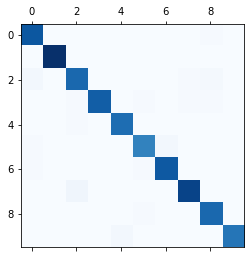

In [131]:
plt.matshow(cm, cmap=plt.cm.Blues)
plt.show()

In [132]:
y_probas = forest.predict_proba(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.2s finished


In [133]:
y_probas

array([[0.004, 0.   , 0.002, ..., 0.976, 0.   , 0.008],
       [0.002, 0.002, 0.016, ..., 0.002, 0.004, 0.002],
       [0.   , 0.996, 0.   , ..., 0.   , 0.002, 0.   ],
       ...,
       [0.002, 0.   , 0.   , ..., 0.014, 0.016, 0.08 ],
       [0.032, 0.014, 0.01 , ..., 0.018, 0.128, 0.018],
       [0.004, 0.   , 0.014, ..., 0.   , 0.002, 0.   ]])

In [134]:
roc_auc_score(y_test, y_probas, multi_class='ovr')

0.9992266616445175

In [135]:
import tensorflow as tf
from keras import backend as K

from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, ReLU, ELU
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [136]:
NUMCLASSES = 10

y_train_oh = to_categorical(y_train, NUMCLASSES)
y_val_oh = to_categorical(y_val, NUMCLASSES)
y_test_oh = to_categorical(y_test, NUMCLASSES)

In [137]:
input_layer = Input((784))

#layer 1
layer1 = Dense(300)(input_layer)
layer1 = BatchNormalization()(layer1)
layer1 = ReLU()(layer1)
layer1 = Dropout(0.4)(layer1)

#Layer 2
layer2 = Dense(100)(layer1)
layer2 = BatchNormalization()(layer2)
layer2 = ReLU()(layer2)
layer2 = Dropout(0.4)(layer2)

output_layer = Dense(NUMCLASSES, activation='softmax')(layer2)

In [138]:
model = Model(input_layer, output_layer, name='DNN')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [139]:
model.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_56 (Batc (None, 300)               1200      
_________________________________________________________________
re_lu_11 (ReLU)              (None, 300)               0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_57 (Batc (None, 100)               400     

In [140]:
early_stop = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

dnn_train_history = model.fit(X_train, y_train_oh, validation_data=(X_val,y_val_oh), batch_size=32, epochs=150,
                              shuffle=True, callbacks=[early_stop])

Epoch 1/150
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3363 - accuracy: 0.5801 - val_loss: 0.2888 - val_accuracy: 0.9211
Epoch 2/150
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4569 - accuracy: 0.8679 - val_loss: 0.1977 - val_accuracy: 0.9418
Epoch 3/150
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3472 - accuracy: 0.8991 - val_loss: 0.1616 - val_accuracy: 0.9517
Epoch 4/150
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.9115 - val_loss: 0.1389 - val_accuracy: 0.9582
Epoch 5/150
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2636 - accuracy: 0.9224 - val_loss: 0.1225 - val_accuracy: 0.9632
Epoch 6/150
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2340 - accuracy: 0.9317 - val_loss: 0.1096 - val_accuracy: 0.9669
Epoch 7/150
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2164 - accuracy: 0.9364 - val_loss: 0.0993 - val_ac

In [141]:
model.evaluate(X_test, y_test_oh)

32/32 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9810


[0.06990727037191391, 0.9810000061988831]

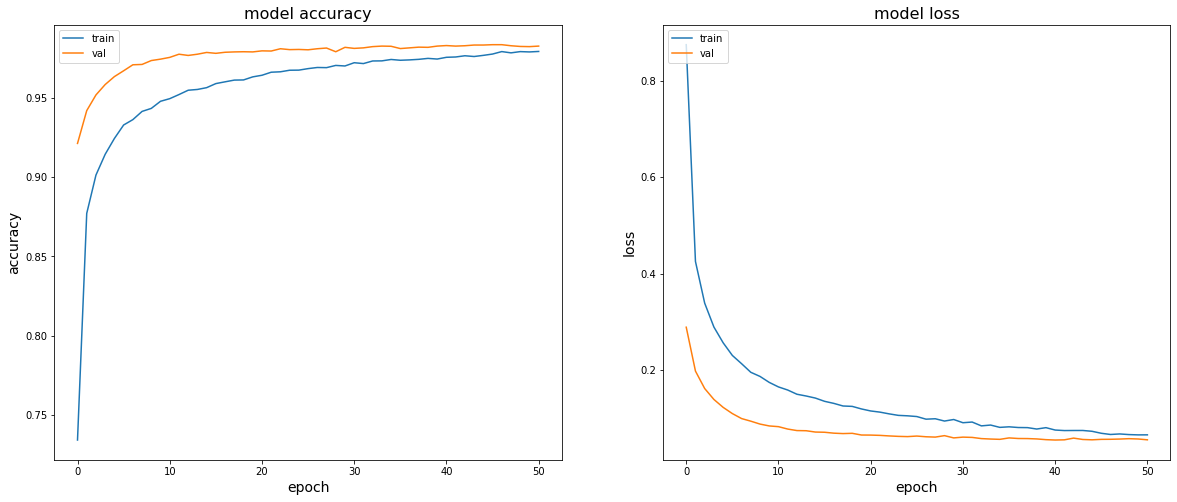

In [142]:
dic = {0:{'plot1':'accuracy', 'plot2':'val_accuracy', 'title':'model accuracy', 'ylabel': 'accuracy', 'xlabel':'epoch',
       'legend': ['train', 'val']},
       1:{'plot1':'loss', 'plot2':'val_loss', 'title':'model loss', 'ylabel': 'loss', 'xlabel':'epoch',
       'legend': ['train', 'val']}}

plt.figure(figsize = (20,8))

for i in range(len(dic)):
    plt.subplot(1, 2, i+1)
    plt.plot(dnn_train_history.history[dic[i]['plot1']])
    plt.plot(dnn_train_history.history[dic[i]['plot2']])
    plt.title(dic[i]['title'], fontsize=16)
    plt.ylabel(dic[i]['ylabel'], fontsize=14)
    plt.xlabel(dic[i]['xlabel'], fontsize=14)
    plt.legend(dic[i]['legend'], loc='upper left')

In [143]:
y_prob= model.predict(X_test)

In [144]:
roc_auc_score(y_test_oh, y_prob, multi_class='ovr')

0.999643858527776

# CNN

In [145]:
def CNN_model():
    input_layer = Input((28,28,1))
    
    #layer 1
    layer1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
    layer1 = BatchNormalization()(layer1)

    layer1 = Conv2D(32, (3,3), activation='relu', padding='same')(layer1)
    layer1 = BatchNormalization()(layer1)

    layer1 = Dropout(0.4)(layer1)
    
    #layer2
    layer2 = Conv2D(64, (3,3), activation='relu', padding='same')(layer1)
    layer2 = BatchNormalization()(layer2)

    layer2 = Conv2D(64, (3,3), activation='relu', padding='same')(layer2)
    layer2 = BatchNormalization()(layer2)

    layer2 = Dropout(0.4)(layer2)
    
    #layer3
    layer3 = Conv2D(128, (3,3), activation='relu', padding='same')(layer2)
    layer3 = BatchNormalization()(layer3)

    layer3 = Conv2D(128, (3,3), activation='relu', padding='same')(layer3)
    layer3 = BatchNormalization()(layer3)

    layer3 = Dropout(0.4)(layer3)
    
    layer3 = Flatten()(layer3)
    
    #Layer4
    layer4 = Dense(128, kernel_initializer='he_normal')(layer3)
    layer4 = BatchNormalization()(layer4)
    layer4 = ReLU()(layer4)
    layer4 = Dropout(0.4)(layer4)
    
    output_layer = Dense(NUMCLASSES, activation='softmax')(layer4)
    
    cnn = Model(input_layer, output_layer, name='CNN')
    cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    
    return cnn   

In [146]:
cnn = CNN_model()

In [147]:
cnn.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_58 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_59 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)        18496   

In [148]:
X_train2 = X_train.reshape((-1,28,28,1))
X_val2 = X_val.reshape((-1,28,28,1))
X_test2 = X_test.reshape((-1,28,28,1))

In [149]:
early_stop = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 0.90 * epoch)

epochs = 100
batch_size = 32

steps_per_epoch = X_train.shape[0] // batch_size

In [150]:
cnn_history = cnn.fit(X_train2, y_train_oh, validation_data=(X_val2,y_val_oh), batch_size=batch_size, 
                      steps_per_epoch = steps_per_epoch, epochs = epochs, shuffle=True, 
                      callbacks=[early_stop, lr_scheduler], verbose=1)

Epoch 1/100
1875/1875 [==============================] - 34s 18ms/step - loss: 2.9079 - accuracy: 0.0976 - val_loss: 2.4416 - val_accuracy: 0.0916
Epoch 2/100
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2681 - accuracy: 0.9208 - val_loss: 0.0414 - val_accuracy: 0.9850
Epoch 3/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0878 - accuracy: 0.9730 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 4/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 5/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0704 - accuracy: 0.9777 - val_loss: 0.0406 - val_accuracy: 0.9869
Epoch 6/100
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0958 - val_accuracy: 0.9682
Epoch 7/100
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0

In [151]:
cnn.evaluate(X_test2, y_test_oh)

32/32 [==============================] - 0s 7ms/step - loss: 0.0306 - accuracy: 0.9950


[0.030608469620347023, 0.9950000047683716]

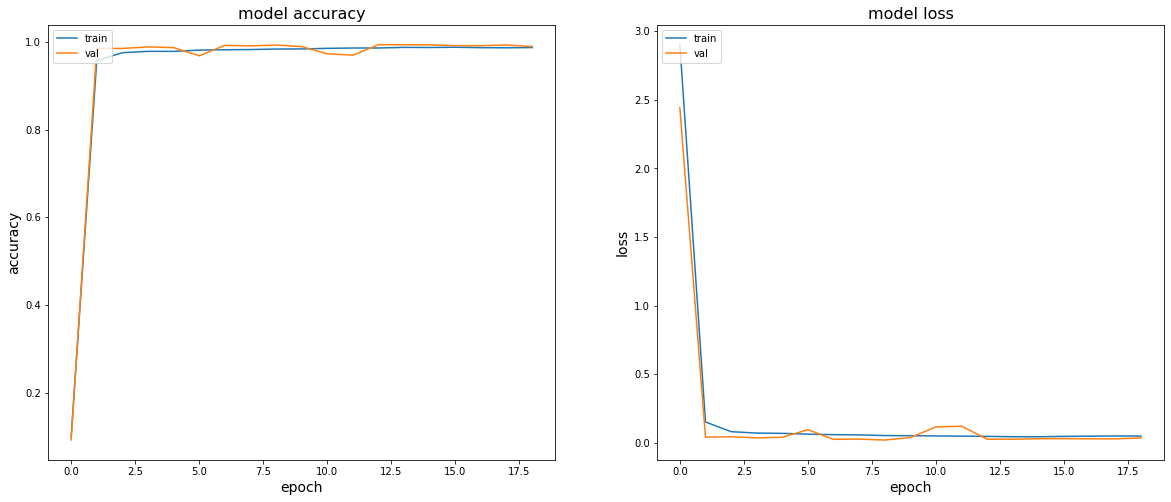

In [152]:
dic = {0:{'plot1':'accuracy', 'plot2':'val_accuracy', 'title':'model accuracy', 'ylabel': 'accuracy', 'xlabel':'epoch',
       'legend': ['train', 'val']},
       1:{'plot1':'loss', 'plot2':'val_loss', 'title':'model loss', 'ylabel': 'loss', 'xlabel':'epoch',
       'legend': ['train', 'val']}}

plt.figure(figsize = (20,8))
for i in range(len(dic)):
    plt.subplot(1, 2, i+1)
    plt.plot(cnn_history.history[dic[i]['plot1']])
    plt.plot(cnn_history.history[dic[i]['plot2']])
    plt.title(dic[i]['title'], fontsize=16)
    plt.ylabel(dic[i]['ylabel'], fontsize=14)
    plt.xlabel(dic[i]['xlabel'], fontsize=14)
    plt.legend(dic[i]['legend'], loc='upper left')

In [153]:
y_prob= cnn.predict(X_test2)

In [154]:
roc_auc_score(y_test_oh, y_prob, multi_class='ovr')

0.9999272146408902